<a href="https://colab.research.google.com/github/Hanips/hija-detector/blob/master/HijaDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DIMAS-TI AMLI Scientific Paper**

Hijaiyah Detector
--------------------------------
Credits:

Ahmad Syafii

Hanief Widya Wardhana

Muhammad Hafidz Amanullah Abyan

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


1. membaca data (lokasi file-mount dari drive)
2. struktur filenya (train/class1/8.jpg)
3. gambar di proses (sesuaikan pixelnya)
4. Struktur model
5. ditest berapa akurasinya



In [ ]:
# mount drive dan import file
import os

from google.colab import drive
drive.mount('/content/drive')
# melakukan ekstraksi pada file zip
# local_zip = '/content/hija.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp')
# zip_ref.close()

base_dir = '/content/drive/MyDrive/hija'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

Mounted at /content/drive


In [ ]:
# membaca direktori pada folder train (class train)
os.listdir(train_dir)

['sya',
 'ja',
 'syu',
 'ji',
 'a',
 'i',
 'aa',
 'ju',
 'syi',
 'ii',
 'ti',
 'yi',
 'tu',
 'zho',
 'uu',
 'ya',
 'ta',
 'zhi',
 'u',
 'yu',
 'zhu']

In [ ]:
# membaca direktori pada folder val (class val)
os.listdir(validation_dir)

['aa',
 'ji',
 'a',
 'syi',
 'i',
 'ii',
 'ju',
 'ja',
 'sya',
 'yi',
 'ti',
 'ya',
 'uu',
 'u',
 'yu',
 'tu',
 'ta',
 'syu',
 'zhi',
 'zhu',
 'zho']

In [ ]:
# membuat direktori FATHAH pada direktori data TRAINING
train_a_dir = os.path.join(train_dir, 'a')
train_ta_dir = os.path.join(train_dir, 'ta')
train_ja_dir = os.path.join(train_dir, 'ja')
train_sya_dir = os.path.join(train_dir, 'sya')
train_zho_dir = os.path.join(train_dir, 'zho')
train_aa_dir = os.path.join(train_dir, 'aa')
train_ya_dir = os.path.join(train_dir, 'ya')

# membuat direktori KASRAH pada direktori data TRAINING
train_i_dir = os.path.join(train_dir, 'i')
train_ti_dir = os.path.join(train_dir, 'ti')
train_ji_dir = os.path.join(train_dir, 'ji')
train_syi_dir = os.path.join(train_dir, 'syi')
train_zhi_dir = os.path.join(train_dir, 'zhi')
train_ii_dir = os.path.join(train_dir, 'ii')
train_yi_dir = os.path.join(train_dir, 'yi')

# membuat direktori DHAMMAH pada direktori data TRAINING
train_u_dir = os.path.join(train_dir, 'u')
train_tu_dir = os.path.join(train_dir, 'tu')
train_ju_dir = os.path.join(train_dir, 'ju')
train_syu_dir = os.path.join(train_dir, 'syu')
train_zhu_dir = os.path.join(train_dir, 'zhu')
train_uu_dir = os.path.join(train_dir, 'uu')
train_yu_dir = os.path.join(train_dir, 'yu')

# membuat direktori FATHAH pada direktori data VALIDASI
validation_a_dir = os.path.join(validation_dir, 'a')
validation_ta_dir = os.path.join(validation_dir, 'ta')
validation_ja_dir = os.path.join(validation_dir, 'ja')
validation_sya_dir = os.path.join(validation_dir, 'sya')
validation_zho_dir = os.path.join(validation_dir, 'zho')
validation_aa_dir = os.path.join(validation_dir, 'aa')
validation_ya_dir = os.path.join(validation_dir, 'ya')

# membuat direktori KASRAH pada direktori data VALIDASI
validation_i_dir = os.path.join(validation_dir, 'i')
validation_ti_dir = os.path.join(validation_dir, 'ti')
validation_ji_dir = os.path.join(validation_dir, 'ji')
validation_syi_dir = os.path.join(validation_dir, 'syi')
validation_zhi_dir = os.path.join(validation_dir, 'zhi')
validation_ii_dir = os.path.join(validation_dir, 'ii')
validation_yi_dir = os.path.join(validation_dir, 'yi')

# membuat direktori DHAMMAH pada direktori data VALIDASI
validation_u_dir = os.path.join(validation_dir, 'u')
validation_tu_dir = os.path.join(validation_dir, 'tu')
validation_ju_dir = os.path.join(validation_dir, 'ju')
validation_syu_dir = os.path.join(validation_dir, 'syu')
validation_zhu_dir = os.path.join(validation_dir, 'zhu')
validation_uu_dir = os.path.join(validation_dir, 'uu')
validation_yu_dir = os.path.join(validation_dir, 'yu')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
batch = 16
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(46, 46),  # mengubah resolusi seluruh gambar
        batch_size=batch,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True)

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(46, 46), # mengubah resolusi seluruh gambar
        batch_size=batch,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True)

Found 1050 images belonging to 21 classes.
Found 210 images belonging to 21 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(46, 46, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(21, activation='softmax')
])

In [ ]:
# lr = 0.00005
# tf.keras.optimizers.Adam(learning_rate=lr)
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy'
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
epoch = 100
# latih model dengan model.fit 
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples//train_generator.batch_size,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=epoch, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=validation_generator.samples//validation_generator.batch_size,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=1)

Epoch 1/100
65/65 [==============================] - 7s 102ms/step - loss: 2.3357e-07 - accuracy: 1.0000 - val_loss: 0.4240 - val_accuracy: 0.9327
Epoch 2/100
65/65 [==============================] - 6s 95ms/step - loss: 8.2316e-08 - accuracy: 1.0000 - val_loss: 0.4089 - val_accuracy: 0.9471
Epoch 3/100
65/65 [==============================] - 6s 96ms/step - loss: 2.8810e-07 - accuracy: 1.0000 - val_loss: 0.3663 - val_accuracy: 0.9471
Epoch 4/100
65/65 [==============================] - 6s 98ms/step - loss: 8.1625e-08 - accuracy: 1.0000 - val_loss: 0.3545 - val_accuracy: 0.9663
Epoch 5/100
65/65 [==============================] - 6s 94ms/step - loss: 5.8682e-08 - accuracy: 1.0000 - val_loss: 0.3734 - val_accuracy: 0.9567
Epoch 6/100
65/65 [==============================] - 6s 96ms/step - loss: 9.2462e-08 - accuracy: 1.0000 - val_loss: 0.3933 - val_accuracy: 0.9327
Epoch 7/100
65/65 [==============================] - 6s 95ms/step - loss: 9.2693e-08 - accuracy: 1.0000 - val_loss: 0.2827 

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

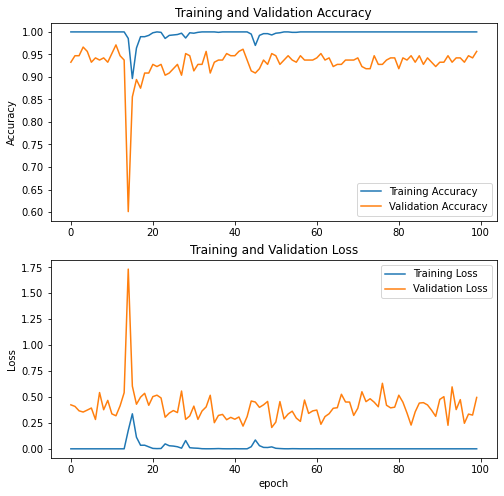

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='best')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('Training and Validation Accuracy')


plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()